In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

In [25]:
df_labels = pd.read_csv('csvjoinv2/scalefree+sn+4+eta+1+numSt+97.join.node.csv')
df_features = pd.read_csv('scalefree.specs.csv', sep=';')

df_features.drop(columns='state', inplace=True)

In [26]:
df_labels['State'] = np.where(
    df_labels['State'] == 'Recovered',
    0,
    1
)

In [27]:
df_labels['State'].value_counts()

0    99587
1      413
Name: State, dtype: int64

In [28]:
df_labels['Id'].value_counts()

p84    1000
p16    1000
p22    1000
p28    1000
p81    1000
       ... 
p91    1000
p41    1000
p99    1000
p5     1000
p62    1000
Name: Id, Length: 100, dtype: int64

In [29]:
df_no_recover_proba = df_labels.groupby('Id')['State'].mean().reset_index(drop=False)
df_no_recover_proba

,Id,State
0,p0,0.000
1,p1,0.000
2,p10,0.000
3,p11,0.000
4,p12,0.000
...,...,...
95,p95,0.000
96,p96,0.000
97,p97,0.005
98,p98,0.000


In [30]:
df_data = df_no_recover_proba.merge(
    df_features,
    on='Id',
    how='left'
)

In [34]:
df_data['binary_state'] = df_data['State'] > 0.0

#df_data.drop(columns='Label', inplace=True)
#df_data.drop(columns='timeset', inplace=True)
#df_data.drop(columns='componentnumber', inplace=True)


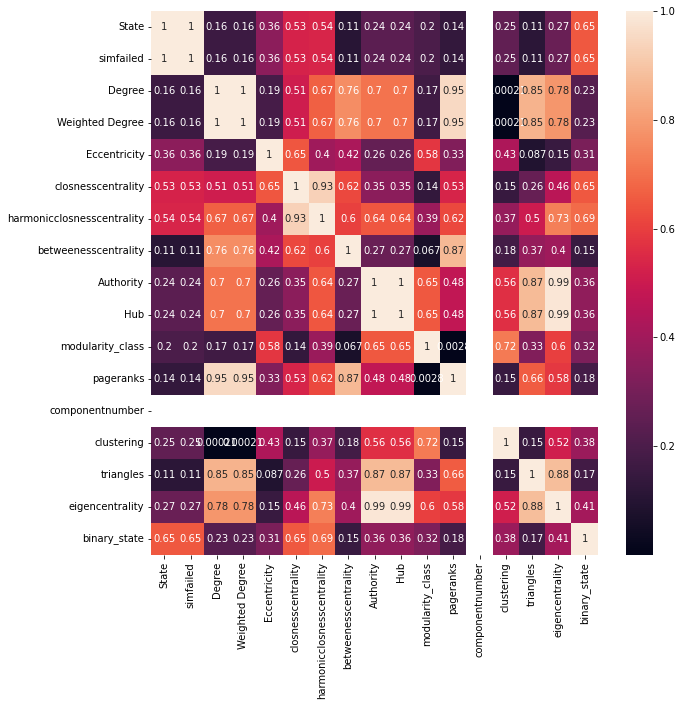

In [35]:
plt.figure(figsize=(10,10))
sns.heatmap(np.abs(df_data.corr()), annot=True)
plt.show()

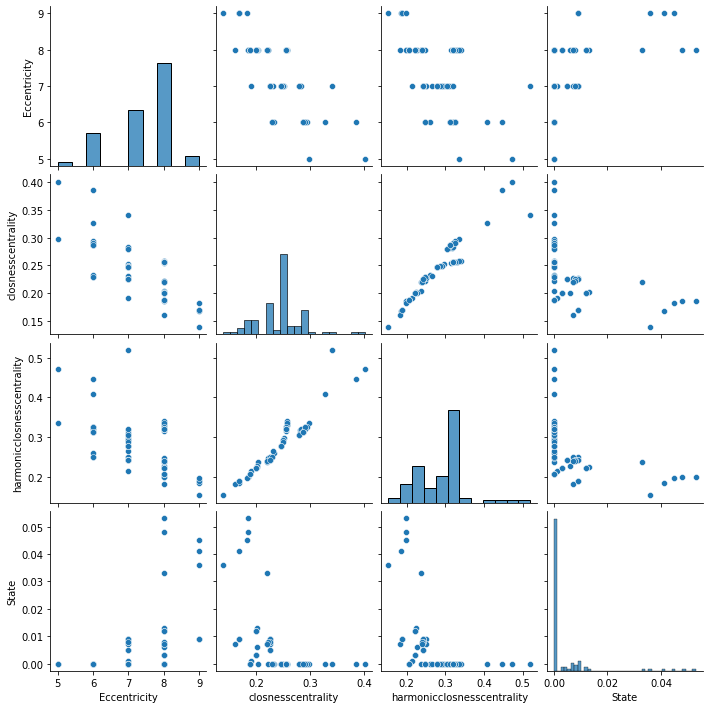

In [36]:
sns.pairplot(
    data=df_data[
        ['Eccentricity',
         'closnesscentrality',
         'harmonicclosnesscentrality',
         'State'
        ]
    ]
)

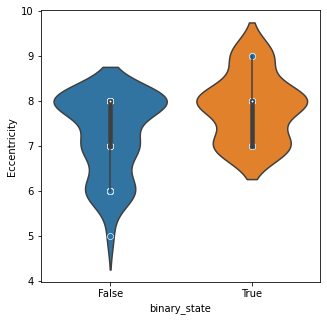

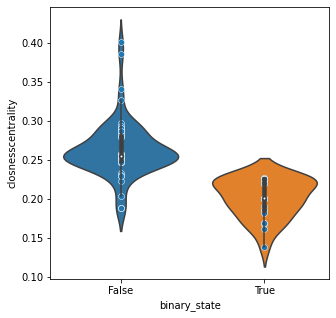

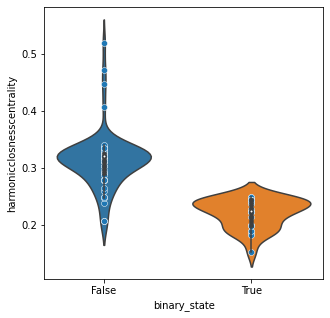

In [37]:
for col in ['Eccentricity',
         'closnesscentrality',
         'harmonicclosnesscentrality']:
    plt.figure(figsize=(5,5))
    sns.violinplot(
        data=df_data,
        y=col,
        x='binary_state'
    )
    sns.scatterplot(
        data=df_data,
        y=col,
        x='binary_state'
    )
    plt.show()

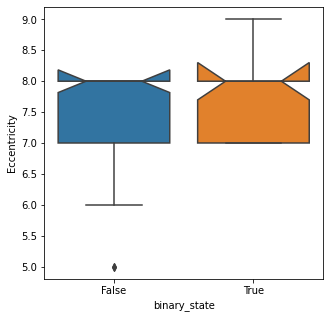

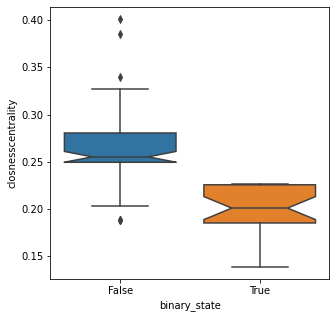

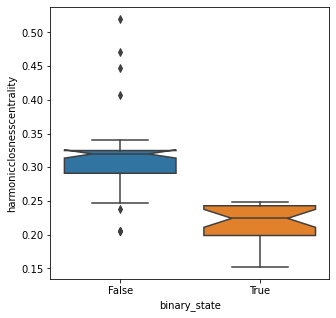

In [38]:
for col in ['Eccentricity',
         'closnesscentrality',
         'harmonicclosnesscentrality']:
    plt.figure(figsize=(5,5))
    sns.boxplot(
        data=df_data,
        y=col,
        x='binary_state',
        notch=True
    )
    plt.show()